In [1]:
import tensorflow as tf
import glob
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# image dimensions
image_height = 60
image_width = 80
image_channels = 3

# other constants
batch_size = 10

In [3]:
# initialization of tensorflow variables and such
init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)

In [4]:
def one_hot_encode(input_array, digits):
    ''' takes an array of input labels and converts it to one-hot encoded labels '''
    enc_array = []
    for i in range(input_array.shape[0]):
        encoded = [0 for x in range(digits)]
        encoded[input_array[i]] = 1
        enc_array.append(encoded)
    return enc_array

In [5]:
def read_and_decode(reader, filename_queue, num_images):
    ''' takes a reader, file queue, and a number of images to make a batch out of.
        returns the batch of images and labels'''
    images = []
    labels = []
    
    for i in range(num_images):
        
        # get the next example from the tfrecord
        _, serialized_example = reader.read(filename_queue)
        
        # parse the example and store it in features
        features = tf.parse_single_example(
            serialized_example,
            features={
                'label': tf.FixedLenFeature([], tf.int64),
                'image_raw': tf.FixedLenFeature([], tf.string)
            })
        
        # extract the data from features
        image_data = features['image_raw']
        image = tf.image.decode_jpeg(image_data, channels=image_channels)
        label = features['label']

        # reshape the images and labels to something easier to deal with
        image = tf.reshape(image, [image_height, image_width, image_channels])
        image = tf.cast(image, tf.float32)
        label = tf.cast(label, tf.int32)
        
        images.append(image)
        labels.append(label)

    return images, labels

In [6]:
# path where the tfrecords can found
record_path = '/media/tom/Files/MyPrograms/Python27/tensorflow_CNN/tfrecord_files/'

# list all of the training and testing examples
train_files = glob.glob(record_path + 'train*.tfrecords')
test_files = glob.glob(record_path + 'test*.tfrecords')

# a queue of all training examples
filename_queue = tf.train.string_input_producer(train_files, shuffle=True)
# a reader for all training examples
reader = tf.TFRecordReader()

# specify how to get the images and labels
next_image, next_label = read_and_decode(reader, filename_queue, batch_size)

(10, 2)
(10, 60, 80, 3)
[0 1]


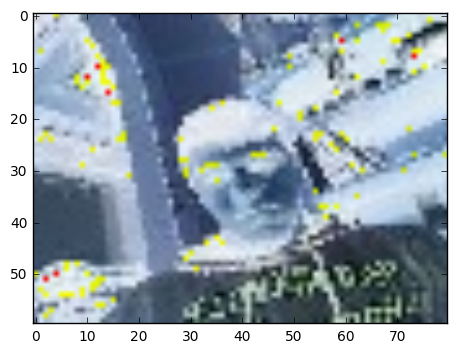

[1 0]


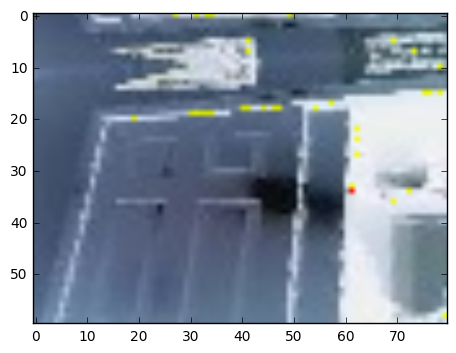

[0 1]


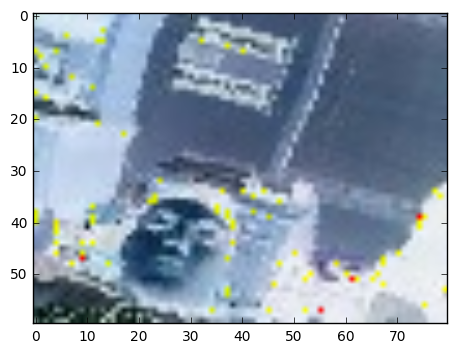

(10, 2)
(10, 60, 80, 3)
[1 0]


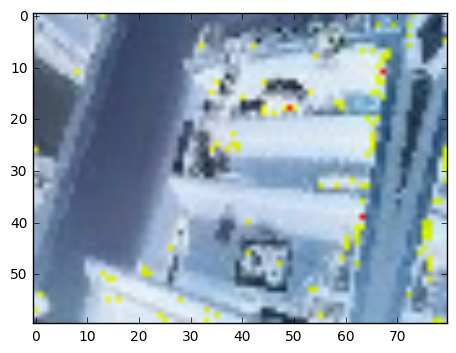

[0 1]


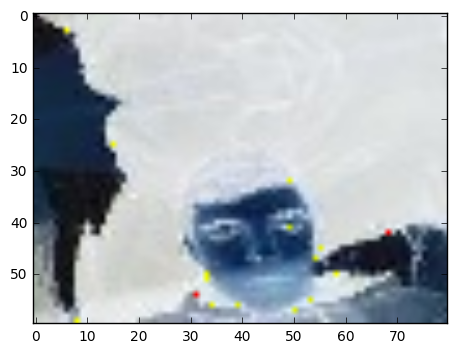

[1 0]


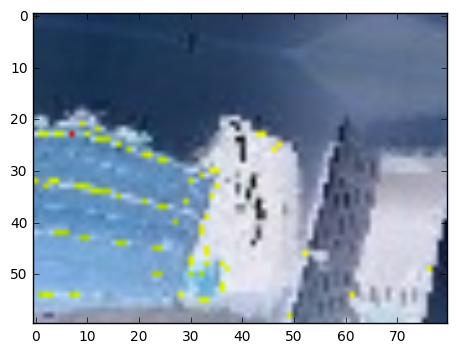

In [7]:
# this is not necessary to run, but will provide validation that your 
# tfrecord files have been set up correctly
# and that you have proper access to them

with tf.Session() as sess:
    # start tensorflow thread coordinators
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord, sess=sess)
    
    for i in range(2):
        # get the images and labels from tfrecords files
        images, labels = sess.run([next_image, next_label])
        
        # process the images
        im_disp = np.array(images)
        im_disp = np.reshape(im_disp, [-1, image_height, image_width, image_channels])
        
        # process the image labels
        lab_disp = np.array(labels)
        lab_enc = one_hot_encode(lab_disp, 2)
        lab_enc = np.array(lab_enc)

        # display some stuff to validate that everything has worked so far
        print(lab_enc.shape)
        print(im_disp.shape)
        
        print(lab_enc[0])
        plt.imshow(im_disp[0])
        plt.show()
        print(lab_enc[5])
        plt.imshow(im_disp[5])
        plt.show()
        print(lab_enc[7])
        plt.imshow(im_disp[7])
        plt.show()
    
    coord.request_stop()
    coord.join(threads)
